In [20]:
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent
sys.path.insert(0, str(PROJECT_ROOT))

### Loss analysis

In [21]:
from torch.utils.data import DataLoader
from src.mintrans import FibonacciModDataset, MinimalTransformer, evaluate_model, train_model
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
data = FibonacciModDataset(num_samples=10)
print(data.__getitem__(0))

(tensor([2, 2, 4, 6, 0, 6, 6, 2, 8]), tensor([2, 4, 6, 0, 6, 6, 2, 8, 0]))


### With the default `10` epoch

In [22]:
vocab_size = 10
train_ds = FibonacciModDataset(num_samples=5000, mod=vocab_size)
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)



model = MinimalTransformer(vocab_size=vocab_size).to(device=device)
train_model(model, train_loader)
evaluate_model(model, train_loader)

Epoch 1, Loss: 2.2085
Epoch 2, Loss: 1.3469
Epoch 3, Loss: 0.9227
Epoch 4, Loss: 0.7797
Epoch 5, Loss: 0.6970
Epoch 6, Loss: 0.6500
Epoch 7, Loss: 0.6144
Epoch 8, Loss: 0.5838
Epoch 9, Loss: 0.5582
Epoch 10, Loss: 0.5343
Epoch 11, Loss: 0.5168
Epoch 12, Loss: 0.5009
Total Training Time: 9.10 seconds
Accuracy: 83.65%


### Epoch increased to `100`

In [23]:
train_model(model, train_loader, epochs=40)
evaluate_model(model, train_loader)

Epoch 1, Loss: 0.4848
Epoch 2, Loss: 0.4731
Epoch 3, Loss: 0.4632
Epoch 4, Loss: 0.4517
Epoch 5, Loss: 0.4482
Epoch 6, Loss: 0.4443
Epoch 7, Loss: 0.4356
Epoch 8, Loss: 0.4338
Epoch 9, Loss: 0.4325
Epoch 10, Loss: 0.4235
Epoch 11, Loss: 0.4285
Epoch 12, Loss: 0.4201
Epoch 13, Loss: 0.4167
Epoch 14, Loss: 0.4155
Epoch 15, Loss: 0.4127
Epoch 16, Loss: 0.4070
Epoch 17, Loss: 0.4126
Epoch 18, Loss: 0.4066
Epoch 19, Loss: 0.4104
Epoch 20, Loss: 0.4030
Epoch 21, Loss: 0.3977
Epoch 22, Loss: 0.3975
Epoch 23, Loss: 0.3959
Epoch 24, Loss: 0.4166
Epoch 25, Loss: 0.3956
Epoch 26, Loss: 0.4029
Epoch 27, Loss: 0.4009
Epoch 28, Loss: 0.3895
Epoch 29, Loss: 0.3946
Epoch 30, Loss: 0.3896
Epoch 31, Loss: 0.3911
Epoch 32, Loss: 0.4027
Epoch 33, Loss: 0.3889
Epoch 34, Loss: 0.3887
Epoch 35, Loss: 0.3889
Epoch 36, Loss: 0.3948
Epoch 37, Loss: 0.3885
Epoch 38, Loss: 0.3938
Epoch 39, Loss: 0.3797
Epoch 40, Loss: 0.3901
Total Training Time: 29.22 seconds
Accuracy: 86.44%


We have `~5.42%` accuracy increase with `10` times more epoch

### Increasing the batch size from `32` to `64` with epoch as `10`

Accuracy goes from ~75-80%

In [24]:
vocab_size = 10 # that is mod in our case
train_ds = FibonacciModDataset(num_samples=5000, mod=vocab_size)
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)



model = MinimalTransformer(vocab_size=vocab_size).to(device=device)
train_model(model, train_loader)
evaluate_model(model, train_loader)

Epoch 1, Loss: 2.2940
Epoch 2, Loss: 1.8292
Epoch 3, Loss: 1.5082
Epoch 4, Loss: 1.3372
Epoch 5, Loss: 1.2004
Epoch 6, Loss: 1.0723
Epoch 7, Loss: 0.9414
Epoch 8, Loss: 0.8482
Epoch 9, Loss: 0.7849
Epoch 10, Loss: 0.7374
Epoch 11, Loss: 0.6887
Epoch 12, Loss: 0.6579
Total Training Time: 2.89 seconds
Accuracy: 78.31%


### Switching back to default `batch_size` of `32`

In [25]:
vocab_size = 10 # that is mod in our case
train_ds = FibonacciModDataset(num_samples=5000, mod=vocab_size)
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)



model = MinimalTransformer(vocab_size=vocab_size).to(device=device)
train_model(model, train_loader)
evaluate_model(model, train_loader)

Epoch 1, Loss: 2.0016
Epoch 2, Loss: 1.1204
Epoch 3, Loss: 0.9242
Epoch 4, Loss: 0.8132
Epoch 5, Loss: 0.7289
Epoch 6, Loss: 0.6728
Epoch 7, Loss: 0.6383
Epoch 8, Loss: 0.6069
Epoch 9, Loss: 0.5875
Epoch 10, Loss: 0.5706
Epoch 11, Loss: 0.5528
Epoch 12, Loss: 0.5378
Total Training Time: 5.56 seconds
Accuracy: 81.48%


## Splitted dataset 

In [26]:
from torch.utils.data import random_split

vocab_size = 10
generated_ds = FibonacciModDataset(num_samples=5000, mod=vocab_size)
train_size = int(0.8 * len(generated_ds)) # 80% to train
test_size = len(generated_ds) - train_size # rest of the size

train_ds, test_ds = random_split(generated_ds, [train_size, test_size]) # randomly splits our dataset

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=32)

model = MinimalTransformer(vocab_size=vocab_size).to(device=device)
train_model(model, train_loader)

evaluate_model(model, test_loader)

Epoch 1, Loss: 2.2056
Epoch 2, Loss: 1.4975
Epoch 3, Loss: 1.0486
Epoch 4, Loss: 0.8584
Epoch 5, Loss: 0.7431
Epoch 6, Loss: 0.6609
Epoch 7, Loss: 0.5904
Epoch 8, Loss: 0.5428
Epoch 9, Loss: 0.5086
Epoch 10, Loss: 0.4825
Epoch 11, Loss: 0.4651
Epoch 12, Loss: 0.4503
Total Training Time: 7.67 seconds
Accuracy: 84.91%


## Splitted dataset and increase in number of epoch.

In [28]:
import torch.nn as nn 

def train_model(model, dataloader, epochs=10, lr=1e-3):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.CrossEntropyLoss()
    model.train()

    accuracy_per_e = []

    for epoch in range(epochs):
        total_loss = 0
        correct, total = 0, 0

        for x, y in dataloader:
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad()
            logits = model(x)
            loss = loss_fn(logits.view(-1, logits.size(-1)), y.view(-1))
            loss.backward()
            optimizer.step()

            pred = logits.argmax(dim=-1)
            correct += (pred == y).sum().item()
            total += y.numel()
            total_loss += loss.item()

        acc = correct / total
        avg_loss = total_loss / len(dataloader)
        accuracy_per_e.append(acc)

        print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")

    print(f"Mean accuracy across epochs (Training): {sum(accuracy_per_e) / len(accuracy_per_e):.4%}")

train_model(model, train_loader, epochs=150)
evaluate_model(model, test_loader)

Epoch 1, Loss: 0.4396
Epoch 2, Loss: 0.4281
Epoch 3, Loss: 0.4209
Epoch 4, Loss: 0.4162
Epoch 5, Loss: 0.4101
Epoch 6, Loss: 0.4073
Epoch 7, Loss: 0.4027
Epoch 8, Loss: 0.3937
Epoch 9, Loss: 0.3876
Epoch 10, Loss: 0.3877
Epoch 11, Loss: 0.3894
Epoch 12, Loss: 0.3961
Epoch 13, Loss: 0.3793
Epoch 14, Loss: 0.3711
Epoch 15, Loss: 0.3725
Epoch 16, Loss: 0.3714
Epoch 17, Loss: 0.3675
Epoch 18, Loss: 0.3629
Epoch 19, Loss: 0.3669
Epoch 20, Loss: 0.3947
Epoch 21, Loss: 0.3614
Epoch 22, Loss: 0.3645
Epoch 23, Loss: 0.3609
Epoch 24, Loss: 0.3557
Epoch 25, Loss: 0.3534
Epoch 26, Loss: 0.3624
Epoch 27, Loss: 0.3521
Epoch 28, Loss: 0.3499
Epoch 29, Loss: 0.3490
Epoch 30, Loss: 0.3495
Epoch 31, Loss: 0.3479
Epoch 32, Loss: 0.3565
Epoch 33, Loss: 0.3511
Epoch 34, Loss: 0.3419
Epoch 35, Loss: 0.3448
Epoch 36, Loss: 0.3447
Epoch 37, Loss: 0.3472
Epoch 38, Loss: 0.3524
Epoch 39, Loss: 0.3426
Epoch 40, Loss: 0.3446
Epoch 41, Loss: 0.3423
Epoch 42, Loss: 0.3372
Epoch 43, Loss: 0.3382
Epoch 44, Loss: 0.33

## Hyperparamater adjustment

Adjusting hypermaters:- (model no longer learns)


`batch_size`: `256`

`epoch`: `20`

`LR`: `10^-3`

`d_model`: `32`

`n_head`: `8`

`n_layer`: `6` 

In [ ]:


vocab_size = 10
batch_size = 1536
generated_ds = FibonacciModDataset(num_samples=5000, mod=vocab_size)

train_size = int(0.8 * len(generated_ds))
test_size = len(generated_ds) - train_size
train_ds, test_ds = random_split(generated_ds, [train_size, test_size]) 

train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=batch_size)


model = MinimalTransformer(vocab_size=vocab_size, d_model=512,n_heads=16, num_layers=1).to(device)

train_model(model, train_loader, epochs=56)
evaluate_model(model, test_loader)


Epoch 1, Loss: 2.7638
Epoch 2, Loss: 1.8719
Epoch 3, Loss: 1.1850
Epoch 4, Loss: 0.7841
Epoch 5, Loss: 0.5680
Epoch 6, Loss: 0.4283
Epoch 7, Loss: 0.3474
Epoch 8, Loss: 0.3066
Epoch 9, Loss: 0.2869
Epoch 10, Loss: 0.2835
Epoch 11, Loss: 0.2811
Epoch 12, Loss: 0.3027
Epoch 13, Loss: 0.3268
Epoch 14, Loss: 0.3183
Epoch 15, Loss: 0.3314
Epoch 16, Loss: 0.3211
Epoch 17, Loss: 0.3060
Epoch 18, Loss: 0.3006
Epoch 19, Loss: 0.2930
Epoch 20, Loss: 0.2812
Epoch 21, Loss: 0.2802
Epoch 22, Loss: 0.2741
Epoch 23, Loss: 0.2739
Epoch 24, Loss: 0.2709
Epoch 25, Loss: 0.2697
Epoch 26, Loss: 0.2689
Epoch 27, Loss: 0.2649
Epoch 28, Loss: 0.2640
Epoch 29, Loss: 0.2667
Epoch 30, Loss: 0.2674
Epoch 31, Loss: 0.2657
Epoch 32, Loss: 0.2685
Epoch 33, Loss: 0.2680
Epoch 34, Loss: 0.2682
Epoch 35, Loss: 0.2666
Epoch 36, Loss: 0.2650
Epoch 37, Loss: 0.2663
Epoch 38, Loss: 0.2652
Epoch 39, Loss: 0.2643
Epoch 40, Loss: 0.2623
Epoch 41, Loss: 0.2624
Epoch 42, Loss: 0.2609
Epoch 43, Loss: 0.2627
Epoch 44, Loss: 0.26

## Change in Fib Generator and overfitting analysis.


I notiched that when the `mod` is set to `10` the accuracy wont go higher than let's say `92%`

Epoch 1, Loss (Training): 2.3324 Loss(val): 2.1988
Epoch 2, Loss (Training): 2.1267 Loss(val): 2.0324
Epoch 3, Loss (Training): 1.9379 Loss(val): 1.8130
Epoch 4, Loss (Training): 1.7042 Loss(val): 1.5744
Epoch 5, Loss (Training): 1.4708 Loss(val): 1.3536
Epoch 6, Loss (Training): 1.2665 Loss(val): 1.1775
Epoch 7, Loss (Training): 1.1074 Loss(val): 1.0440
Epoch 8, Loss (Training): 0.9780 Loss(val): 0.9264
Epoch 9, Loss (Training): 0.8689 Loss(val): 0.8323
Epoch 10, Loss (Training): 0.7805 Loss(val): 0.7514
Epoch 11, Loss (Training): 0.7075 Loss(val): 0.6833
Epoch 12, Loss (Training): 0.6477 Loss(val): 0.6277
Epoch 13, Loss (Training): 0.6006 Loss(val): 0.5856
Epoch 14, Loss (Training): 0.5599 Loss(val): 0.5496
Epoch 15, Loss (Training): 0.5265 Loss(val): 0.5184
Epoch 16, Loss (Training): 0.4967 Loss(val): 0.4897
Epoch 17, Loss (Training): 0.4711 Loss(val): 0.4625
Epoch 18, Loss (Training): 0.4484 Loss(val): 0.4459
Epoch 19, Loss (Training): 0.4274 Loss(val): 0.4228
Epoch 20, Loss (Train

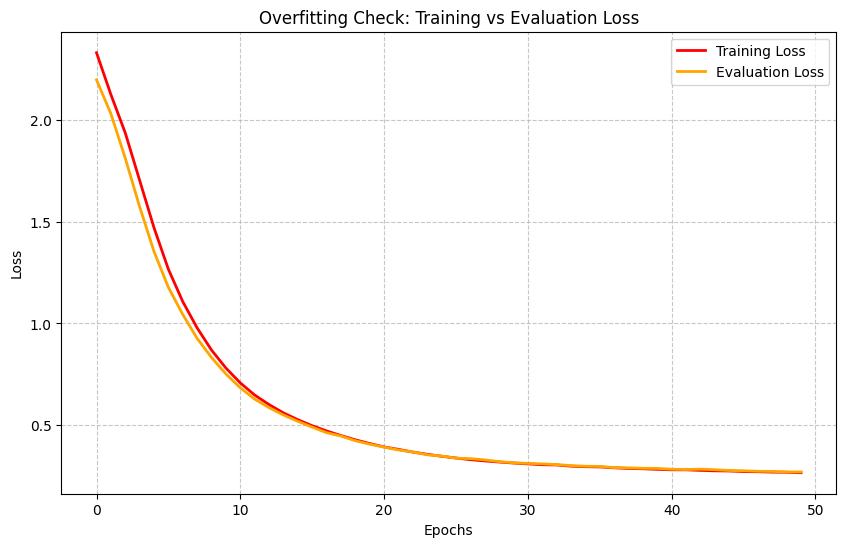

In [7]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
import time
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


class FibonacciModDataset(Dataset):
    def __init__(self, seq_len=10, mod=10, num_samples=10000):
        self.mod = mod

        self.global_seq = self.generate_fib_sequence(1000, mod)
        self.samples = []
        for _ in range(num_samples):
            start_idx = torch.randint(0, len(self.global_seq) - seq_len - 1, (1,)).item()
            seq = self.global_seq[start_idx:start_idx + seq_len + 1]
            x = torch.tensor(seq[:-1], dtype=torch.long)
            y = torch.tensor(seq[1:], dtype=torch.long)
            self.samples.append((x, y))

    def generate_fib_sequence(self, length, mod):
        seq = [1, 1] # these are the starting values
        while len(seq) < length: # this prevents overlap
            seq.append((seq[-1] + seq[-2]) % mod)
        return seq

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        return self.samples[idx]

class MinimalTransformer(nn.Module):
    def __init__(self, vocab_size, d_model=16, n_heads=2, num_layers=1, max_seq_len=20):
        super().__init__()
        self.token_embed = nn.Embedding(vocab_size, d_model)
        self.pos_embed = nn.Embedding(max_seq_len, d_model)
        self.layers = nn.ModuleList([
            nn.MultiheadAttention(d_model, n_heads, batch_first=True)
            for _ in range(num_layers)
        ])
        self.out_proj = nn.Linear(d_model, vocab_size)

    def forward(self, tokens):
        B, T = tokens.shape
        pos = torch.arange(T, device=tokens.device)
        x = self.token_embed(tokens) + self.pos_embed(pos).unsqueeze(0)
        attn_mask = torch.triu(torch.ones(T, T, device=tokens.device) * float('-inf'), diagonal=1)
        for attn in self.layers:
            attn_out, _ = attn(x, x, x, attn_mask=attn_mask)
            x = x + attn_out
        return self.out_proj(x)
    


train_plot = []
eval_plot = []
def train_model(model, dataloader, test_loader, epochs=12, lr=0.001):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.CrossEntropyLoss()
    start_time = time.time()
    
    for epoch in range(epochs):
        model.train() # because we have that eval mode after each epoch
        total_loss = 0
        for x, y in dataloader:
            x, y = x.to(device), y.to(device)
            
            logits = model(x)
            loss = loss_fn(logits.view(-1, logits.size(-1)), y.view(-1))
            

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        avg_loss = total_loss / len(dataloader)
        train_plot.append({'loss': avg_loss, 'epoch': epoch})  
        
        model.eval()
        with torch.no_grad():
            val_loss = evaluate_model(model, test_loader)
            eval_plot.append(val_loss)
    
        avg_loss = total_loss / len(dataloader)
        print(f"Epoch {epoch+1}, Loss (Training): {avg_loss:.4f} Loss(val): {val_loss:.4f}")
    
    end_time = time.time()
    print(f"Total Training Time: {end_time - start_time:.2f} seconds")

def evaluate_model(model, dataloader, show_accuracy = False):
    correct, total = 0, 0
    loss_fn = nn.CrossEntropyLoss()
    model.eval()
    total_loss = 0

    with torch.no_grad():
        for x, y in dataloader:
            x, y = x.to(device), y.to(device)
            logits = model(x)
            pred = logits.argmax(dim=-1)

            loss = loss_fn(logits.view(-1, logits.size(-1)), y.view(-1))
            total_loss += loss.item()

            # correct += (pred[:, 1:] == y[:, 1:]).sum().item()
            # total += y[:, 1:].numel()

            correct += (pred == y).sum().item()
            total += y.numel()
    if show_accuracy:
      print(f"Accuracy: {correct / total:.2%}")

    avg_loss = total_loss / len(dataloader) 
    return avg_loss

vocab_size = 10
batch_size = 64
generated_ds = FibonacciModDataset(num_samples=5000, mod=vocab_size, seq_len=10)



train_size = int(0.8 * len(generated_ds))
test_size = len(generated_ds) - train_size
train_ds, test_ds = random_split(generated_ds, [train_size, test_size]) 

train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=batch_size)


model = MinimalTransformer(vocab_size=vocab_size).to(device)

train_model(model, train_loader, epochs=50, test_loader=test_loader)
evaluate_model(model, test_loader, show_accuracy=True)



def overfitting_plot(train_history, eval_losses):
    epochs = [x['epoch'] for x in train_history]
    train_losses = [x['loss'] for x in train_history]
    
    plt.figure(figsize=(10, 6))

    plt.plot(epochs, train_losses, label='Training Loss', color='red', linewidth=2)
    plt.plot(epochs, eval_losses, label='Evaluation Loss', color='orange', linewidth=2)

    plt.title('Overfitting Check: Training vs Evaluation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
overfitting_plot(train_plot, eval_plot)



### Let's check for odd mode of `13` same number of epoch.

Epoch 1, Loss (Training): 3.2378 Loss(val): 3.0311
Epoch 2, Loss (Training): 2.8683 Loss(val): 2.6650
Epoch 3, Loss (Training): 2.4810 Loss(val): 2.2481
Epoch 4, Loss (Training): 2.0525 Loss(val): 1.8208
Epoch 5, Loss (Training): 1.6453 Loss(val): 1.4345
Epoch 6, Loss (Training): 1.2904 Loss(val): 1.1057
Epoch 7, Loss (Training): 0.9889 Loss(val): 0.8366
Epoch 8, Loss (Training): 0.7556 Loss(val): 0.6328
Epoch 9, Loss (Training): 0.5779 Loss(val): 0.4780
Epoch 10, Loss (Training): 0.4332 Loss(val): 0.3580
Epoch 11, Loss (Training): 0.3212 Loss(val): 0.2608
Epoch 12, Loss (Training): 0.2330 Loss(val): 0.1919
Epoch 13, Loss (Training): 0.1712 Loss(val): 0.1477
Epoch 14, Loss (Training): 0.1290 Loss(val): 0.1042
Epoch 15, Loss (Training): 0.0921 Loss(val): 0.0833
Epoch 16, Loss (Training): 0.0824 Loss(val): 0.0646
Epoch 17, Loss (Training): 0.0557 Loss(val): 0.0452
Epoch 18, Loss (Training): 0.0412 Loss(val): 0.0349
Epoch 19, Loss (Training): 0.0325 Loss(val): 0.0277
Epoch 20, Loss (Train

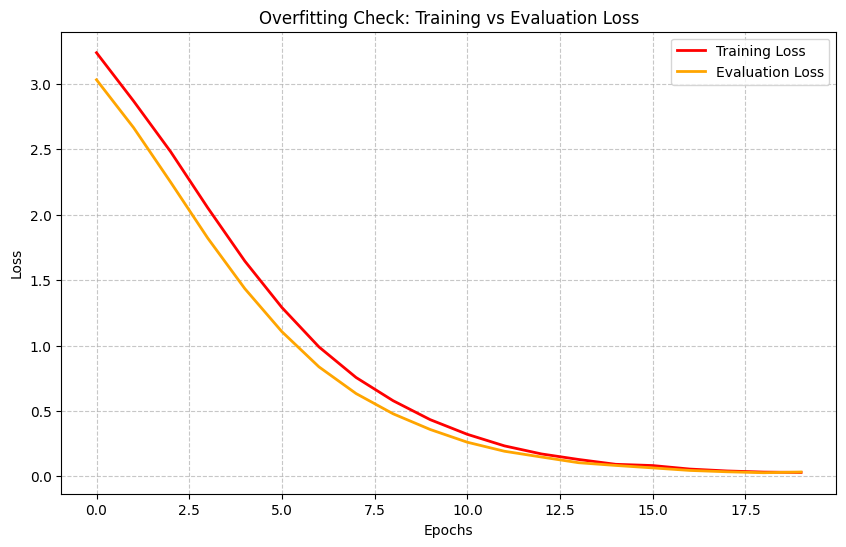

In [2]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
import time
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


class FibonacciModDataset(Dataset):
    def __init__(self, seq_len=10, mod=10, num_samples=10000):
        self.mod = mod

        self.global_seq = self.generate_fib_sequence(1000, mod)
        self.samples = []
        for _ in range(num_samples):
            start_idx = torch.randint(0, len(self.global_seq) - seq_len - 1, (1,)).item()
            seq = self.global_seq[start_idx:start_idx + seq_len + 1]
            x = torch.tensor(seq[:-1], dtype=torch.long)
            y = torch.tensor(seq[1:], dtype=torch.long)
            self.samples.append((x, y))

    def generate_fib_sequence(self, length, mod):
        seq = [1, 1] # these are the starting values
        while len(seq) < length: # this prevents overlap
            seq.append((seq[-1] + seq[-2]) % mod)
        return seq

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        return self.samples[idx]

class MinimalTransformer(nn.Module):
    def __init__(self, vocab_size, d_model=12, n_heads=6, num_layers=2, max_seq_len=20):
        super().__init__()
        self.token_embed = nn.Embedding(vocab_size, d_model)
        self.pos_embed = nn.Embedding(max_seq_len, d_model)
        self.layers = nn.ModuleList([
            nn.MultiheadAttention(d_model, n_heads, batch_first=True)
            for _ in range(num_layers)
        ])
        self.out_proj = nn.Linear(d_model, vocab_size)

    def forward(self, tokens):
        B, T = tokens.shape
        pos = torch.arange(T, device=tokens.device)
        x = self.token_embed(tokens) + self.pos_embed(pos).unsqueeze(0)
        attn_mask = torch.triu(torch.ones(T, T, device=tokens.device) * float('-inf'), diagonal=1)
        for attn in self.layers:
            attn_out, _ = attn(x, x, x, attn_mask=attn_mask)
            x = x + attn_out
        return self.out_proj(x)
    


train_plot = []
eval_plot = []
def train_model(model, dataloader, test_loader, epochs=12, lr=0.001):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.CrossEntropyLoss()
    start_time = time.time()
    train_acc_per_epoch = 0
    for epoch in range(epochs):
        model.train() # because we have that eval mode after each epoch
        total_loss = 0
        for x, y in dataloader:
            x, y = x.to(device), y.to(device)
            
            logits = model(x)
            loss = loss_fn(logits[:, 1:].reshape(-1, logits.size(-1)), y[:, 1:].reshape(-1))

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        avg_loss = total_loss / len(dataloader)
        train_plot.append({'loss': avg_loss, 'epoch': epoch})  
        
        model.eval()
        with torch.no_grad():
            val_loss, accuracy = evaluate_model(model, test_loader, show_accuracy=False)
            eval_plot.append(val_loss)
            train_acc_per_epoch += accuracy
        
        avg_loss = total_loss / len(dataloader)
        print(f"Epoch {epoch+1}, Loss (Training): {avg_loss:.4f} Loss(val): {val_loss:.4f}")
    
    end_time = time.time()
    train_acc_per_epoch = train_acc_per_epoch / epochs
    print(f"Total Training Time: {end_time - start_time:.2f} seconds {train_acc_per_epoch}")


def evaluate_model(model, dataloader, show_accuracy = False):
    correct, total = 0, 0
    loss_fn = nn.CrossEntropyLoss()
    model.eval()
    total_loss = 0

    with torch.no_grad():
        for x, y in dataloader:
            x, y = x.to(device), y.to(device)
            logits = model(x)
            pred = logits.argmax(dim=-1)

            loss = loss_fn(logits[:, 1:].reshape(-1, logits.size(-1)), y[:, 1:].reshape(-1))
            total_loss += loss.item()

            correct += (pred[:, 1:] == y[:, 1:]).sum().item()
            total += y[:, 1:].numel()

            # correct += (pred == y).sum().item()
            # total += y.numel()
    if show_accuracy:
      print(f"Accuracy: {correct / total:.2%}")
    accuracy = (correct / total) * 100
    avg_loss = total_loss / len(dataloader) 
    return avg_loss, accuracy

vocab_size = 23 
batch_size = 128
generated_ds = FibonacciModDataset(num_samples=5000, mod=vocab_size, seq_len=10)



train_size = int(0.8 * len(generated_ds))
test_size = len(generated_ds) - train_size
train_ds, test_ds = random_split(generated_ds, [train_size, test_size]) 

train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=batch_size)


model = MinimalTransformer(vocab_size=vocab_size).to(device)

train_model(model, train_loader, epochs=20, test_loader=test_loader)
evaluate_model(model, test_loader, show_accuracy=True)



def overfitting_plot(train_history, eval_losses):
    epochs = [x['epoch'] for x in train_history]
    train_losses = [x['loss'] for x in train_history]
    
    plt.figure(figsize=(10, 6))

    plt.plot(epochs, train_losses, label='Training Loss', color='red', linewidth=2)
    plt.plot(epochs, eval_losses, label='Evaluation Loss', color='orange', linewidth=2)

    plt.title('Overfitting Check: Training vs Evaluation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
overfitting_plot(train_plot, eval_plot)

## Lowering the `seq_len` to `2` in the same code.

Epoch 1, Loss (Training): 3.1942 Loss(val): 2.9029
Epoch 2, Loss (Training): 2.6248 Loss(val): 2.3761
Epoch 3, Loss (Training): 2.1722 Loss(val): 1.9990
Epoch 4, Loss (Training): 1.8417 Loss(val): 1.7086
Epoch 5, Loss (Training): 1.5857 Loss(val): 1.4856
Epoch 6, Loss (Training): 1.3804 Loss(val): 1.2933
Epoch 7, Loss (Training): 1.2063 Loss(val): 1.1337
Epoch 8, Loss (Training): 1.0564 Loss(val): 0.9907
Epoch 9, Loss (Training): 0.9230 Loss(val): 0.8644
Epoch 10, Loss (Training): 0.8034 Loss(val): 0.7510
Epoch 11, Loss (Training): 0.6945 Loss(val): 0.6422
Epoch 12, Loss (Training): 0.5933 Loss(val): 0.5515
Epoch 13, Loss (Training): 0.5123 Loss(val): 0.4782
Epoch 14, Loss (Training): 0.4432 Loss(val): 0.4128
Epoch 15, Loss (Training): 0.3829 Loss(val): 0.3550
Epoch 16, Loss (Training): 0.3310 Loss(val): 0.3084
Epoch 17, Loss (Training): 0.2905 Loss(val): 0.2718
Epoch 18, Loss (Training): 0.2583 Loss(val): 0.2428
Epoch 19, Loss (Training): 0.2319 Loss(val): 0.2180
Epoch 20, Loss (Train

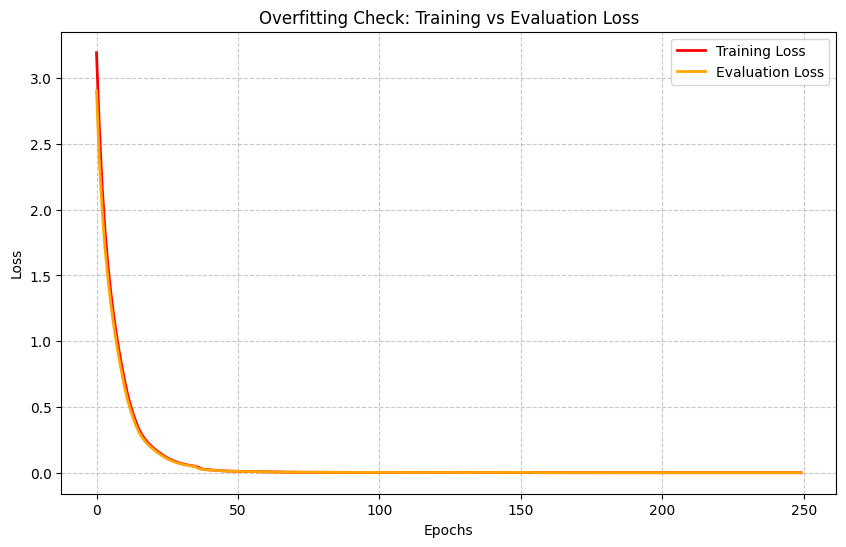

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
import time
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


class FibonacciModDataset(Dataset):
    def __init__(self, seq_len=10, mod=10, num_samples=10000):
        self.mod = mod

        self.global_seq = self.generate_fib_sequence(1000, mod)
        self.samples = []
        for _ in range(num_samples):
            start_idx = torch.randint(0, len(self.global_seq) - seq_len - 1, (1,)).item()
            seq = self.global_seq[start_idx:start_idx + seq_len + 1]
            x = torch.tensor(seq[:-1], dtype=torch.long)
            y = torch.tensor(seq[1:], dtype=torch.long)
            self.samples.append((x, y))

    def generate_fib_sequence(self, length, mod):
        seq = [1, 1] # these are the starting values
        while len(seq) < length: # this prevents overlap
            seq.append((seq[-1] + seq[-2]) % mod)
        return seq

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        return self.samples[idx]

class MinimalTransformer(nn.Module):
    def __init__(self, vocab_size, d_model=12, n_heads=1, num_layers=1, max_seq_len=20):
        super().__init__()
        self.token_embed = nn.Embedding(vocab_size, d_model)
        self.pos_embed = nn.Embedding(max_seq_len, d_model)
        self.layers = nn.ModuleList([
            nn.MultiheadAttention(d_model, n_heads, batch_first=True)
            for _ in range(num_layers)
        ])
        self.out_proj = nn.Linear(d_model, vocab_size)

    def forward(self, tokens):
        B, T = tokens.shape
        pos = torch.arange(T, device=tokens.device)
        x = self.token_embed(tokens) + self.pos_embed(pos).unsqueeze(0)
        attn_mask = torch.triu(torch.ones(T, T, device=tokens.device) * float('-inf'), diagonal=1)
        for attn in self.layers:
            attn_out, _ = attn(x, x, x, attn_mask=attn_mask)
            x = x + attn_out
        return self.out_proj(x)
    


train_plot = []
eval_plot = []
def train_model(model, dataloader, test_loader, epochs=12, lr=0.001):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.CrossEntropyLoss()
    start_time = time.time()
    
    for epoch in range(epochs):
        model.train() # because we have that eval mode after each epoch
        total_loss = 0
        for x, y in dataloader:
            x, y = x.to(device), y.to(device)
            
            logits = model(x)
            loss = loss_fn(logits[:, 1:].reshape(-1, logits.size(-1)), y[:, 1:].reshape(-1))

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        avg_loss = total_loss / len(dataloader)
        train_plot.append({'loss': avg_loss, 'epoch': epoch})  
        
        model.eval()
        with torch.no_grad():
            val_loss = evaluate_model(model, test_loader)
            eval_plot.append(val_loss)
    
        avg_loss = total_loss / len(dataloader)
        print(f"Epoch {epoch+1}, Loss (Training): {avg_loss:.4f} Loss(val): {val_loss:.4f}")
    
    end_time = time.time()
    print(f"Total Training Time: {end_time - start_time:.2f} seconds")


def evaluate_model(model, dataloader, show_accuracy = False):
    correct, total = 0, 0
    loss_fn = nn.CrossEntropyLoss()
    model.eval()
    total_loss = 0

    with torch.no_grad():
        for x, y in dataloader:
            x, y = x.to(device), y.to(device)
            logits = model(x)
            pred = logits.argmax(dim=-1)

            loss = loss_fn(logits[:, 1:].reshape(-1, logits.size(-1)), y[:, 1:].reshape(-1))
            total_loss += loss.item()

            correct += (pred[:, 1:] == y[:, 1:]).sum().item()
            total += y[:, 1:].numel()

            # correct += (pred == y).sum().item()
            # total += y.numel()
    if show_accuracy:
      print(f"Accuracy (eval mode): {correct / total:.2%}")

    avg_loss = total_loss / len(dataloader) 
    return avg_loss

vocab_size = 23 
batch_size = 64
generated_ds = FibonacciModDataset(num_samples=25000, mod=vocab_size, seq_len=20)



train_size = int(0.8 * len(generated_ds))
test_size = len(generated_ds) - train_size
train_ds, test_ds = random_split(generated_ds, [train_size, test_size]) 

train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=batch_size)


model = MinimalTransformer(vocab_size=vocab_size).to(device)

train_model(model, train_loader, epochs=250, test_loader=test_loader)
evaluate_model(model, test_loader, show_accuracy=True)



def overfitting_plot(train_history, eval_losses):
    epochs = [x['epoch'] for x in train_history]
    train_losses = [x['loss'] for x in train_history]
    
    plt.figure(figsize=(10, 6))

    plt.plot(epochs, train_losses, label='Training Loss', color='red', linewidth=2)
    plt.plot(epochs, eval_losses, label='Evaluation Loss', color='orange', linewidth=2)

    plt.title('Overfitting Check: Training vs Evaluation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
overfitting_plot(train_plot, eval_plot)